# Importing Modules and Declaring Variables

In [1]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from gensim import corpora, models
from pprint import pprint
import json
import pickle
import re
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
import matplotlib.pyplot as plt

In [3]:
from gensim.models import CoherenceModel

In [4]:
base_dir= "/content/drive/My Drive/Cal State LA/Machine Learning/Datasets/Datasets-v2/"

# Loading Pickle Files

In [5]:
with open(base_dir+'laptop_review_bigrams.pkl','rb') as f:
  review_bigrams = pickle.load(f)
with open(base_dir+'laptop_review_lemmatized.pkl', 'rb') as f:
  data_lemmatized = pickle.load(f)
with open(base_dir+'laptop_review_corpus.pkl','rb') as f:
  corpus_review = pickle.load(f)

In [6]:
id2word = corpora.Dictionary(data_lemmatized)

# Calculating Perplexity and Coherence Scores

In [ ]:
coherences = []
num_topic = []
lda_perplexity = []
for i in range(5,25):
  num_topic.append(i)
  lda_model_laptop_review = gensim.models.LdaMulticore(corpus=corpus_review,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
  lda_perplexity.append(lda_model_laptop_review.log_perplexity(corpus_review))
  coherence_model = CoherenceModel(model=lda_model_laptop_review, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
  coherences.append(coherence_model.get_coherence())


In [ ]:
df_perplexity = pd.DataFrame(num_topic, columns=['num_topics'])

In [ ]:
df_perplexity['lda_perplexity'] = lda_perplexity
df_perplexity['coherences'] = coherences

In [ ]:
with open(base_dir+'perplexity.pkl', 'wb') as f:
  pickle.dump(df_perplexity, f)

In [ ]:
coherences_new = []
num_topic_new = []
lda_perplexity_new = []
for i in range(2,5):
  num_topic_new.append(i)
  lda_model_laptop_review = gensim.models.LdaMulticore(corpus=corpus_review,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
  lda_perplexity_new.append(lda_model_laptop_review.log_perplexity(corpus_review))
  coherence_model = CoherenceModel(model=lda_model_laptop_review, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
  coherences_new.append(coherence_model.get_coherence())

In [ ]:
df_perplexity_new = pd.DataFrame(num_topic_new, columns=['num_topics'])
df_perplexity_new['lda_perplexity'] = lda_perplexity_new
df_perplexity_new['coherences'] = coherences_new

In [ ]:
with open(base_dir+'perplexity.pkl', 'rb') as f:
  df_perplexity=pickle.load(f)

In [ ]:
frames = [df_perplexity_new, df_perplexity]
df_perplexity = pd.concat(frames, ignore_index=True)

# Visualization

In [ ]:
df_perplexity

,num_topics,lda_perplexity,coherences
0,2,-7.216064,0.336253
1,3,-7.216814,0.321364
2,4,-7.229966,0.348297
3,5,-7.247021,0.372164
4,6,-7.263806,0.353709
5,7,-7.279212,0.376689
6,8,-7.299272,0.391011
7,9,-7.314320,0.401615
8,10,-7.338942,0.387560
9,11,-7.361658,0.393057


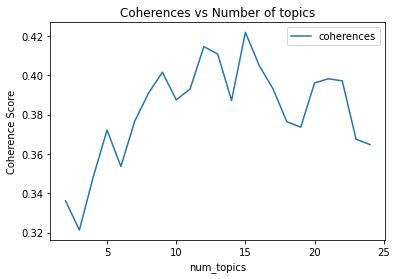

In [ ]:
df_perplexity.plot(x='num_topics', y='coherences', title='Coherences vs Number of topics', ylabel='Coherence Score')

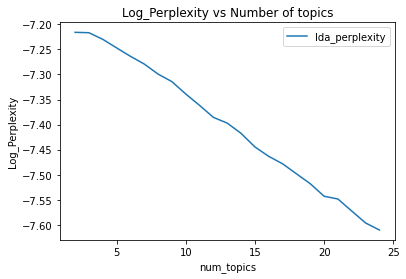

In [ ]:
df_perplexity.plot(x='num_topics', y='lda_perplexity', title='Log_Perplexity vs Number of topics', ylabel='Log_Perplexity')

# Hyperparameter Tuning

In [7]:
lda_model_laptop_review = gensim.models.LdaMulticore(corpus=corpus_review,
                                       id2word=id2word,
                                       num_topics=15, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [9]:
coherence_model = CoherenceModel(model=lda_model_laptop_review, texts=data_lemmatized, dictionary=id2word, coherence='c_v')

In [12]:
coherence_lda = coherence_model.get_coherence()
coherence_lda

0.407133985903868

In [13]:
lda_model_laptop_review.print_topics(15, 5)

[(0,
  '0.052*"key" + 0.051*"keyboard" + 0.037*"use" + 0.025*"touch" + 0.022*"pad"'),
 (1,
  '0.077*"usb" + 0.073*"port" + 0.038*"device" + 0.037*"wifi" + 0.030*"power"'),
 (2,
  '0.103*"tablet" + 0.096*"great" + 0.095*"good" + 0.055*"work" + 0.051*"price"'),
 (3, '0.054*"buy" + 0.037*"love" + 0.031*"use" + 0.030*"year" + 0.022*"get"'),
 (4,
  '0.029*"game" + 0.019*"high" + 0.018*"play" + 0.016*"graphic" + 0.016*"performance"'),
 (5,
  '0.063*"screen" + 0.035*"quality" + 0.029*"feel" + 0.024*"build" + 0.020*"keyboard"'),
 (6,
  '0.127*"drive" + 0.077*"hard" + 0.044*"memory" + 0.030*"ram" + 0.026*"upgrade"'),
 (7,
  '0.019*"description" + 0.017*"fold" + 0.015*"swap" + 0.015*"bezel" + 0.012*"zenbook"'),
 (8,
  '0.022*"thing" + 0.022*"go" + 0.019*"get" + 0.016*"would" + 0.016*"review"'),
 (9,
  '0.023*"problem" + 0.021*"work" + 0.019*"issue" + 0.017*"buy" + 0.017*"would"'),
 (10,
  '0.032*"screen" + 0.031*"use" + 0.023*"keyboard" + 0.022*"great" + 0.021*"nice"'),
 (11,
  '0.061*"window" +

In [14]:
lda_model_laptop_review.save(base_dir+'lda_model_laptop_review_15.model')